# Machine Learning - 1 : PROJECT

# Team 1 : Members
    1. Sourav Sen
    2. Deepak Das Menon
    3. Fathima Hafeez
    4. Bipasha Saha

# Data Set : Concrete Compressive Strength Data Set

    https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
    
    Abstract: Concrete is the most important material in civil engineering. The concrete compressive strength is a  highly nonlinear function of age and ingredients.
    
    Data Set Information:
    1) Number of instances 1030
    2) Number of Attributes 9
    3) Attribute breakdown 8 quantitative input variables, 1 quantitative output variable and No Missing Attribute  Values

#### Attribute Information

|             Label             |                                       Description                                      | Units        |   |   |
|:-----------------------------:|:--------------------------------------------------------------------------------------:|--------------|---|---|
| Cement                        | Binding material to bind all the materials to form concrete                            | kg m^3       |   |   |
| Blast Furnace Slag            | Acts as binder with Cement                                                             | kg m^3       |   |   |
| Fly Ash                       | Acts as binder with Cement                                                             | kg m^3       |   |   |
| Water                         | To mix all the materials and bring to a right proportion                               | kg m^3       |   |   |
| Superplasticizer              | To decrease the water-cement ratio                                                     | kg m^3       |   |   |
| Coarse Aggregate              | Uncrushed Gravel Sand                                                                  | kg m^3       |   |   |
| Fine Aggregate                | Crushed Gravel Sand                                                                    | kg m^3       |   |   |
| Age                           | Concrete curing days                                                                   | days         |   |   |
| Concrete Compressive Strength | The strength of the concrete obtained after mixing all the above materials and curing. | N/m^2 or MPa |   |   |

# Problem Statement

#### Identify the features affecting the compressive strength of concrete using Regression

# Import Required Libraries

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import time
from lazypredict.Supervised import LazyRegressor

# Loading the Data

In [56]:
df = pd.read_excel('Concrete_Data.xls')
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [57]:
df.columns = ['Cement','Slag','Ash','Water','Superplasticizer','CoarseAgg','FineAgg','Age','Strength']
df.head()

,Cement,Slag,Ash,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


In [58]:
df.to_csv('data.csv')

# Summary of the DataSet

In [59]:
df.shape

(1030, 9)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Ash               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAgg         1030 non-null   float64
 6   FineAgg           1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### <i>Observations :<i>
    1) 1030 data points in the given Data set
    2) There are no categorical data only numerical data
    3) There is no Null Values in the given data
    4) INPUT Variables : cement,slag,ash,water,superplastic,coarseagg,fineagg,age 
    5) Strength is an output paramater as it depends on the %combinations of above inputs

# Data Cleaning

In [61]:
# Checking for duplicate values
print("Duplicate rows:", len(df[df.duplicated()]))

Duplicate rows: 25


In [62]:
# Remove the duplicates from the data set
df=df.drop_duplicates()
print("Shape after dropping duplicate rows:",df.shape)

Shape after dropping duplicate rows: (1005, 9)


In [63]:
# Reset Index after droping Duplicates
df.reset_index(drop=True, inplace=True)

# EDA : Exploratory Data Analysis

### AUTO EDA

In [64]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (1030, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables

################ Regression VISUALIZATION Started #####################


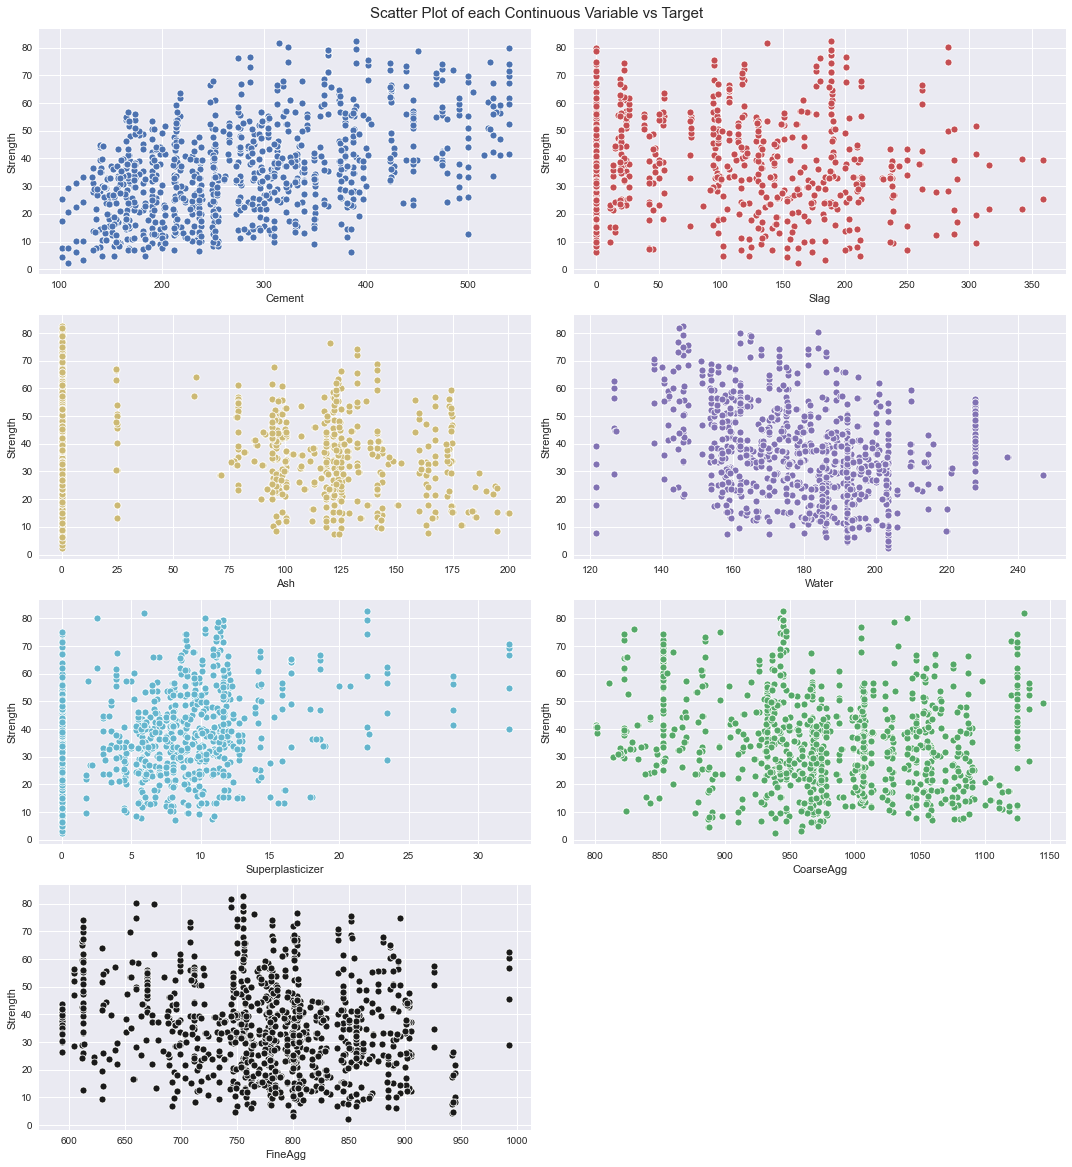

Number of All Scatter Plots = 28


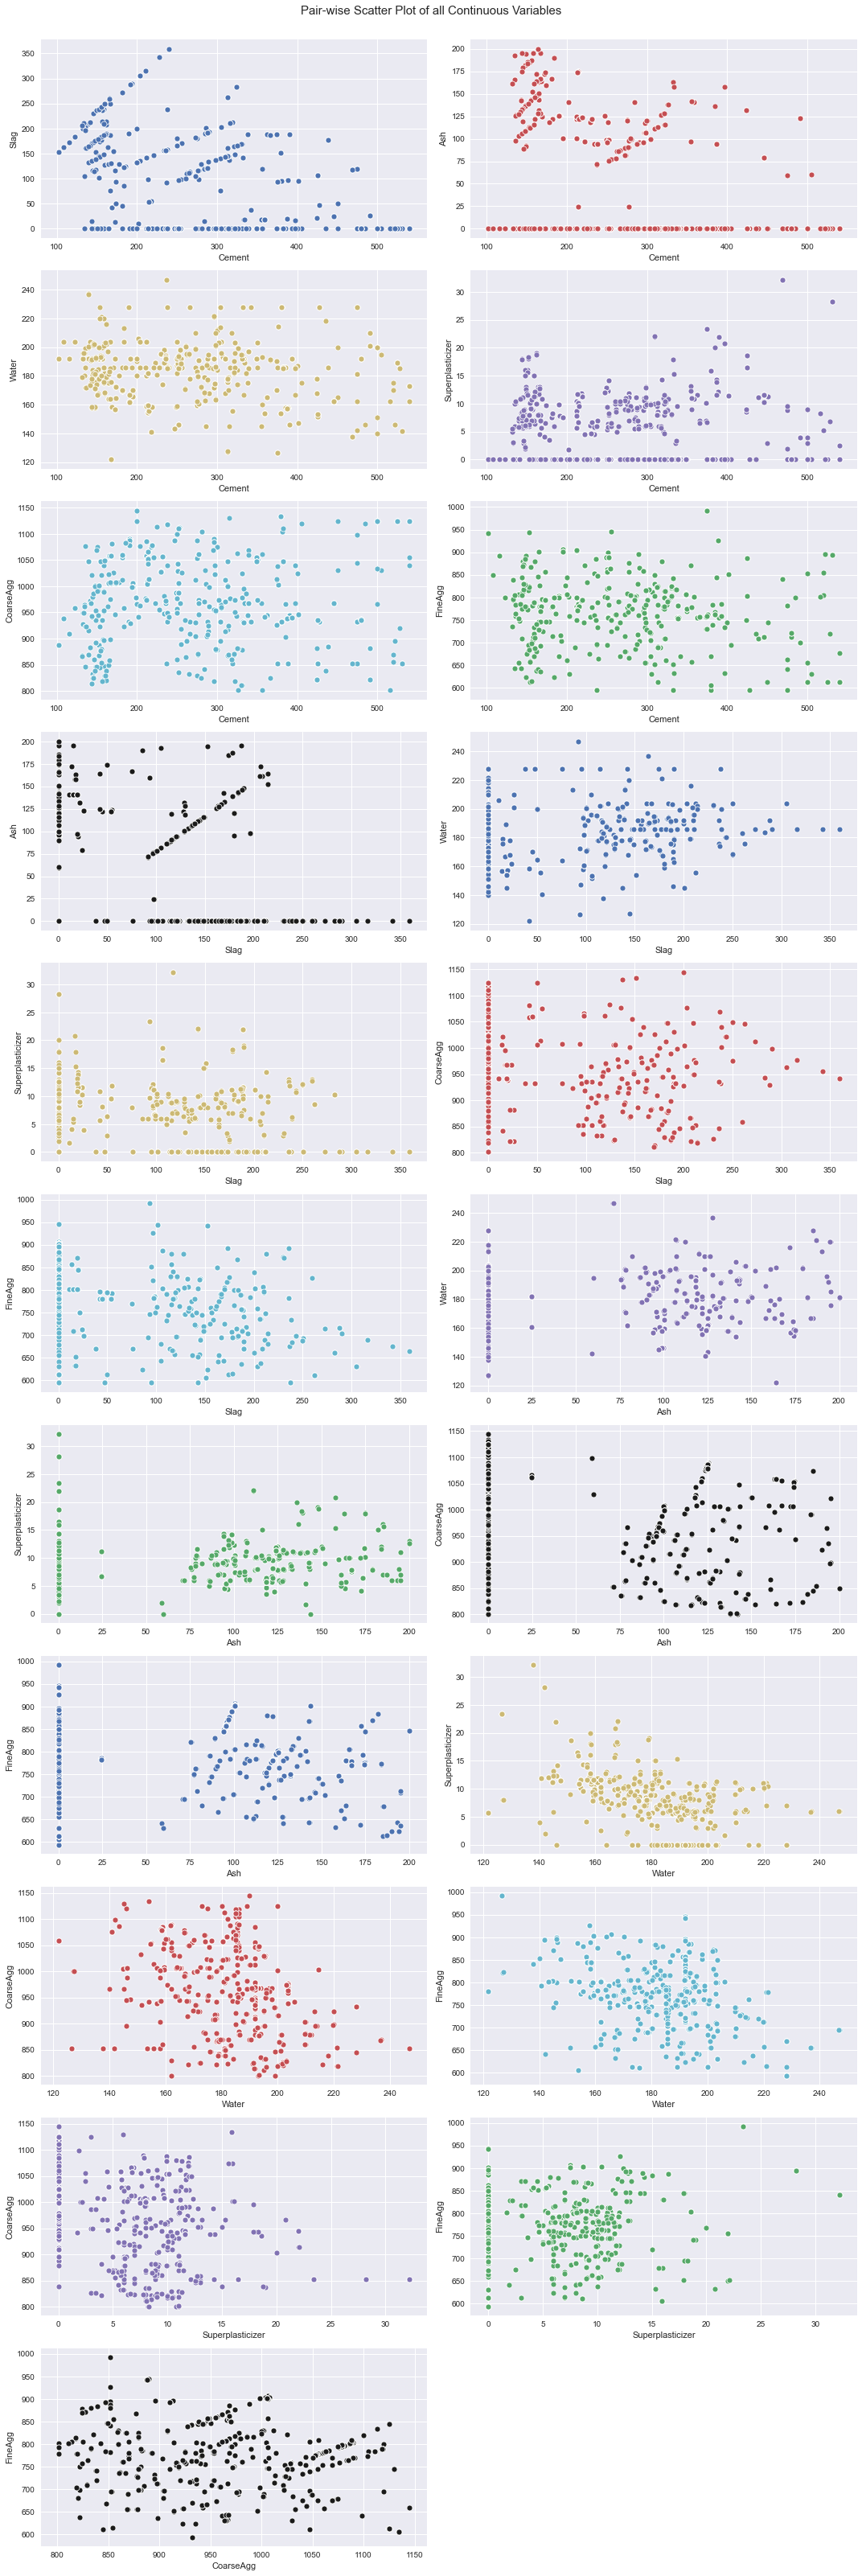

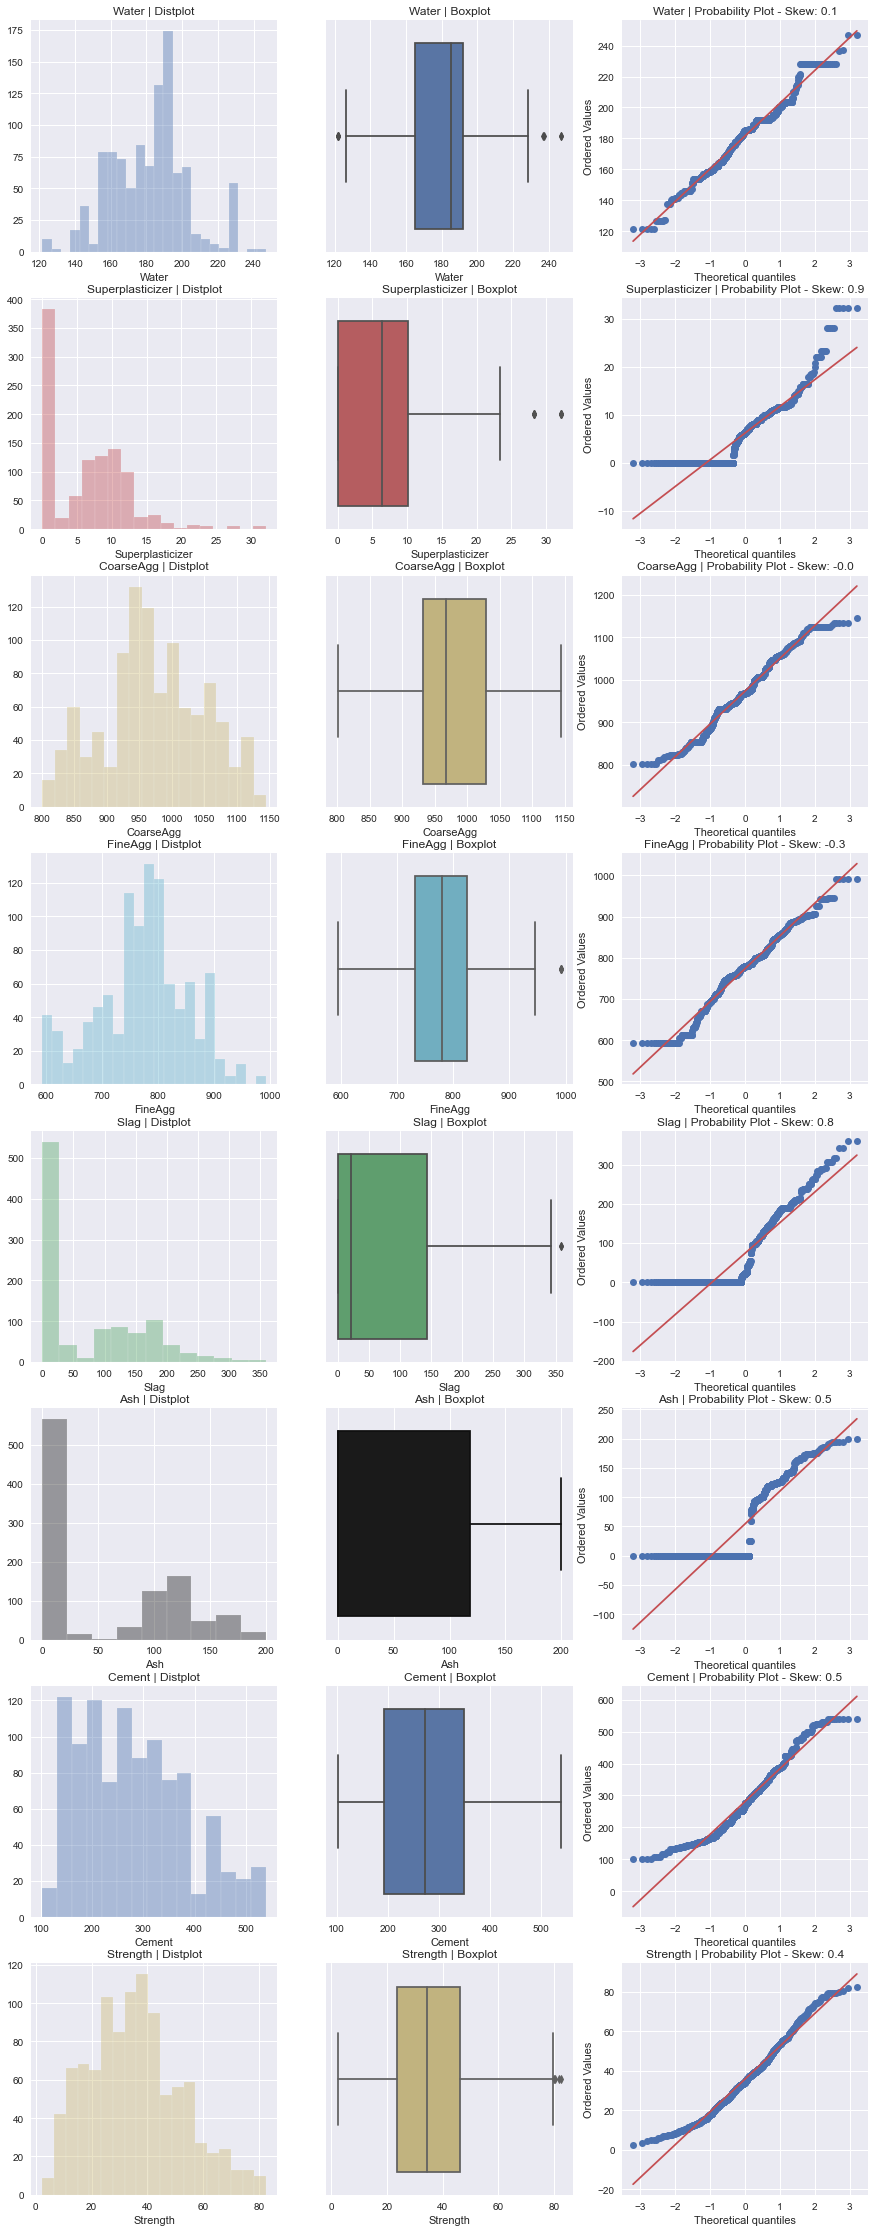

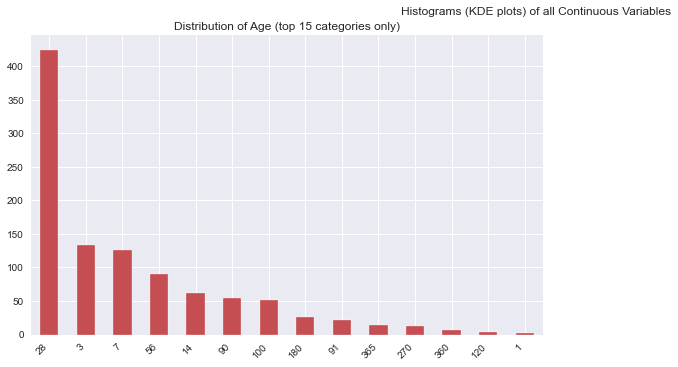

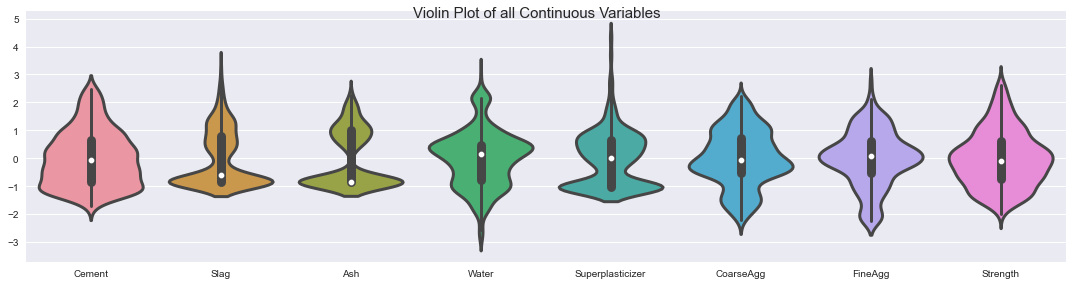

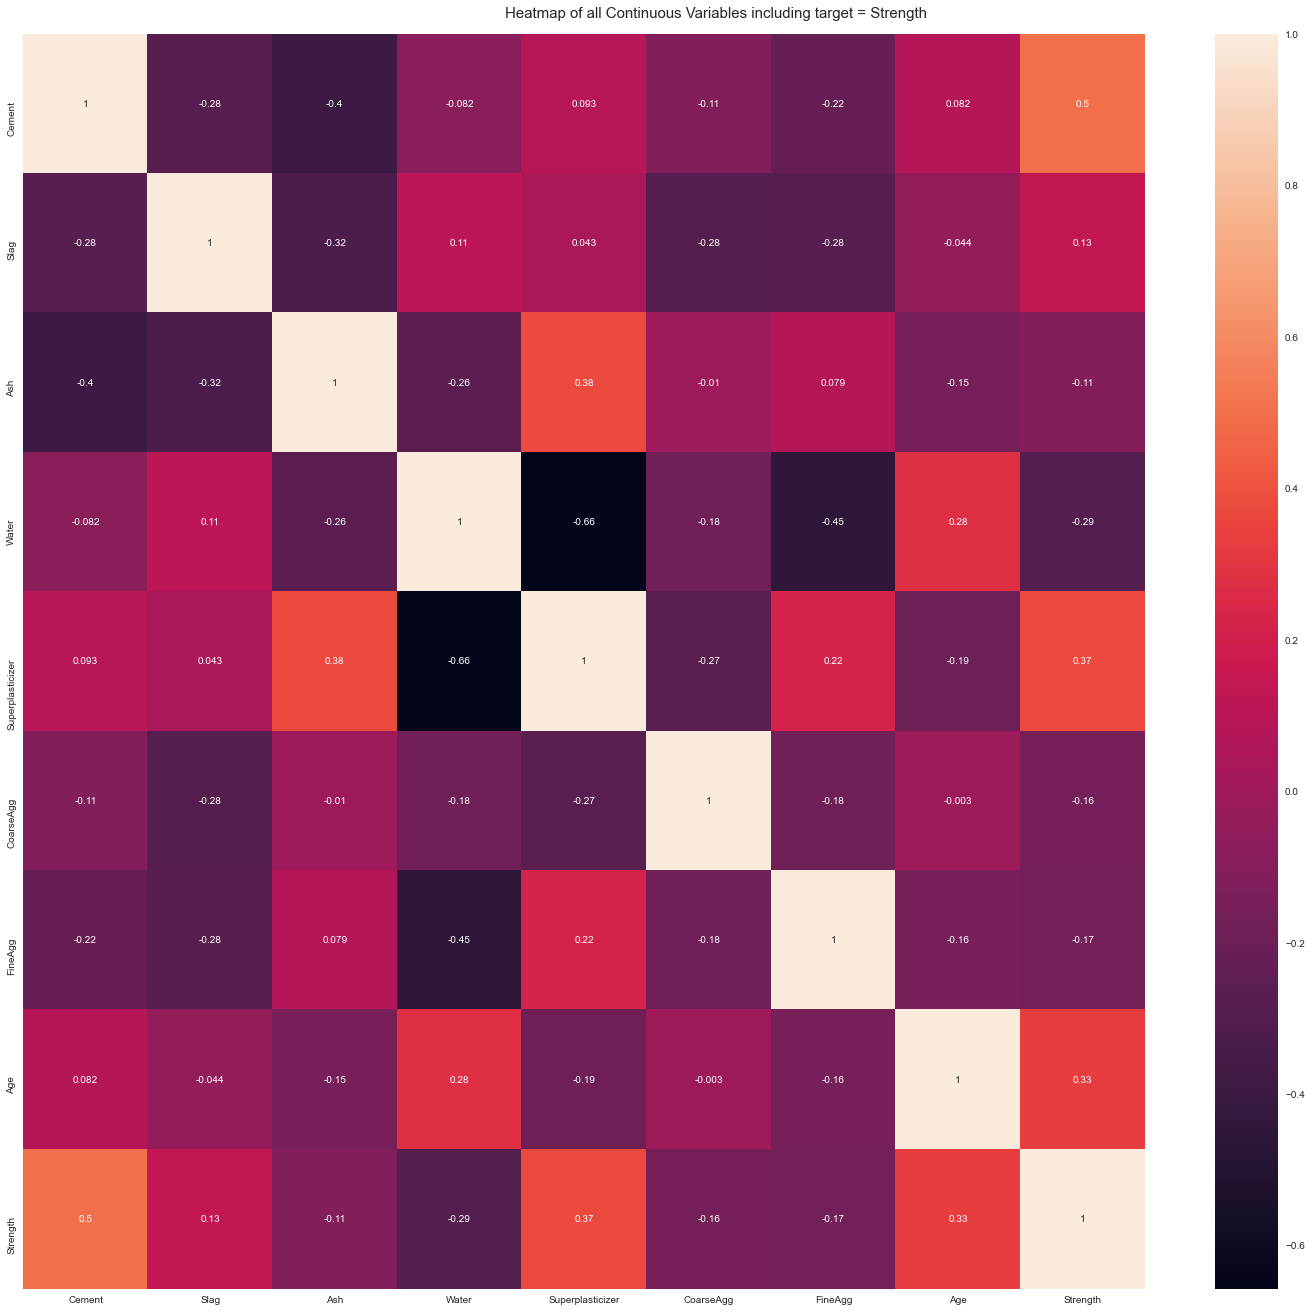

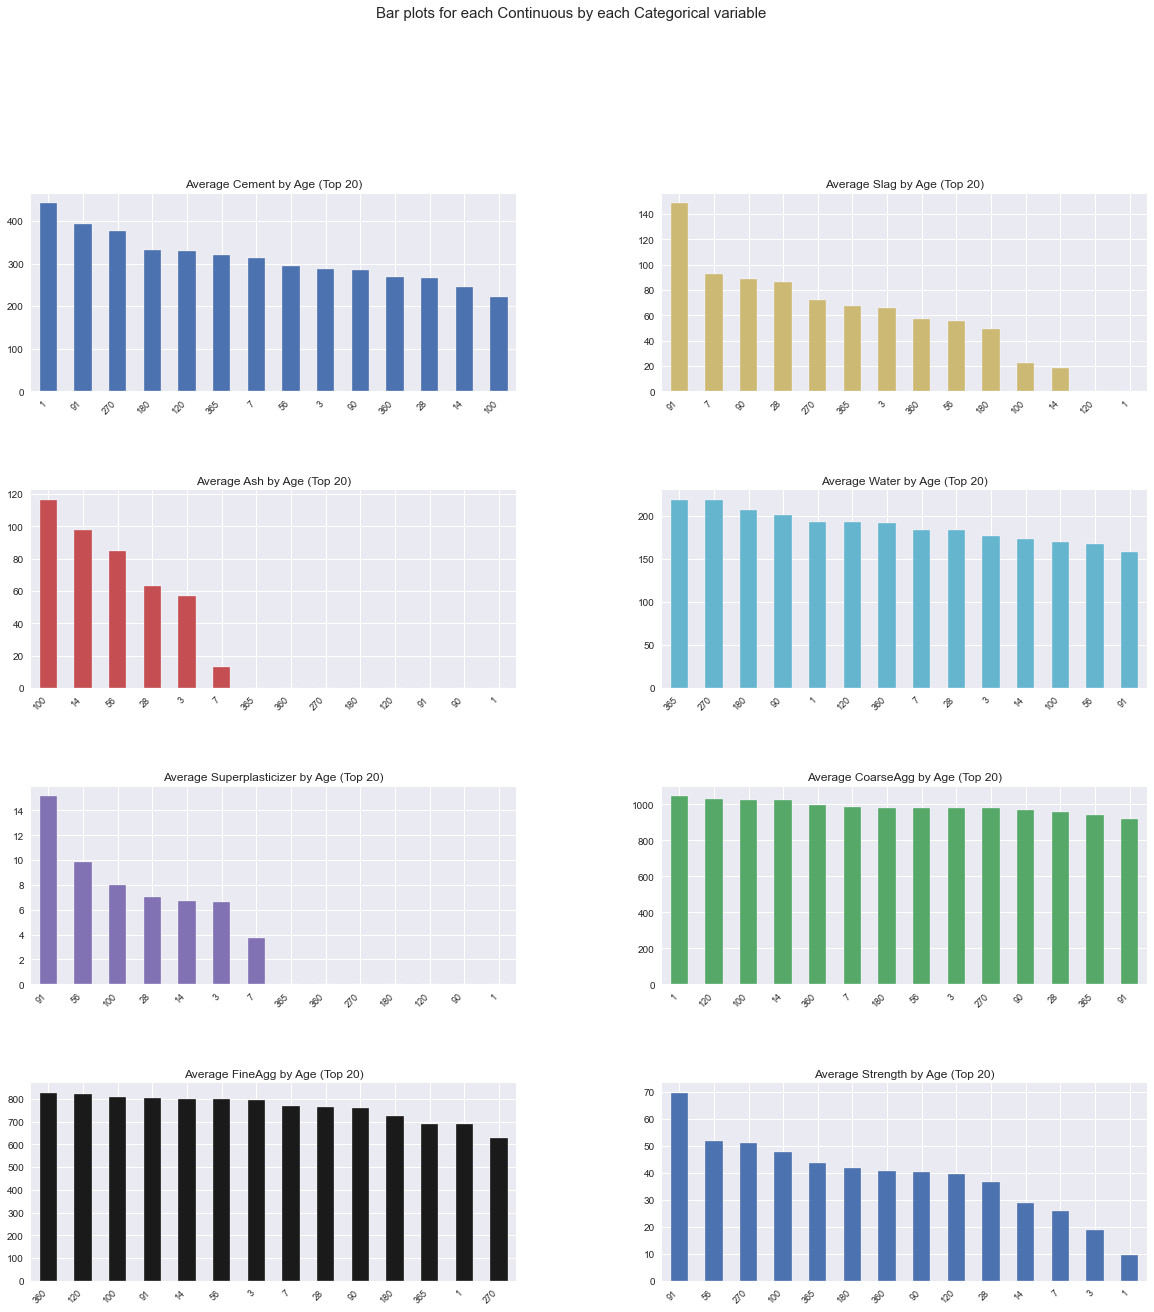

All Plots done
Time to run AutoViz (in seconds) = 15.320

 ###################### VISUALIZATION Completed ########################


In [65]:
visual= AV.AutoViz(filename='data.csv', depVar='Strength')

### MANUAL EDA

In [66]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1005.00,278.63,104.35,102.00,190.68,265.00,349.00,540.00
Slag,1005.00,72.04,86.17,0.00,0.00,20.00,142.50,359.40
Ash,1005.00,55.54,64.21,0.00,0.00,0.00,118.27,200.10
Water,1005.00,182.07,21.34,121.75,166.61,185.70,192.94,247.00
Superplasticizer,1005.00,6.03,5.92,0.00,0.00,6.10,10.00,32.20
CoarseAgg,1005.00,974.38,77.58,801.00,932.00,968.00,1031.00,1145.00
FineAgg,1005.00,772.69,80.34,594.00,724.30,780.00,822.20,992.60
Age,1005.00,45.86,63.73,1.00,7.00,28.00,56.00,365.00
Strength,1005.00,35.25,16.28,2.33,23.52,33.80,44.87,82.60


# Distribution and Box Plot

In [67]:
def custom_plot(var, col):
    fig , axes  = plt.subplots(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(var,hist=True,kde=True,rug=True,color=col)
    plt.title(f" skew = {round(var.skew(),3)} & kurt = {round(var.kurt(),3)}")
    plt.subplot(1,2,2)
    sns.boxplot(var, color=col)
    plt.show()

### OUTPUT Variable

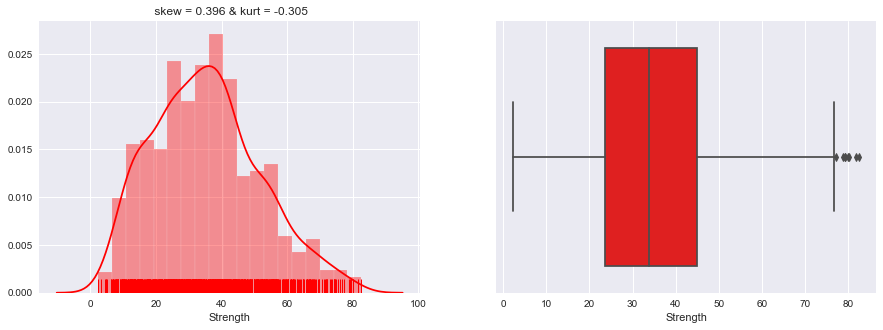

In [68]:
custom_plot(df.Strength, 'Red')

### INPUT Variables

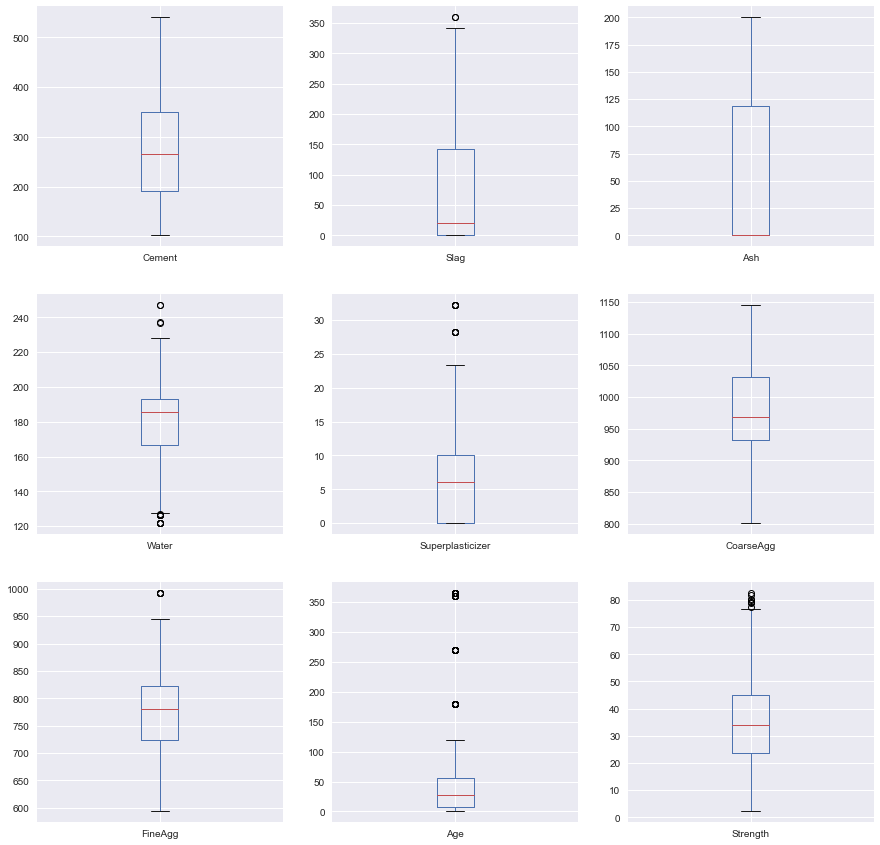

In [69]:
    df.plot(kind='box',subplots=True,layout = (3,3),figsize=(15,15))
    plt.show()

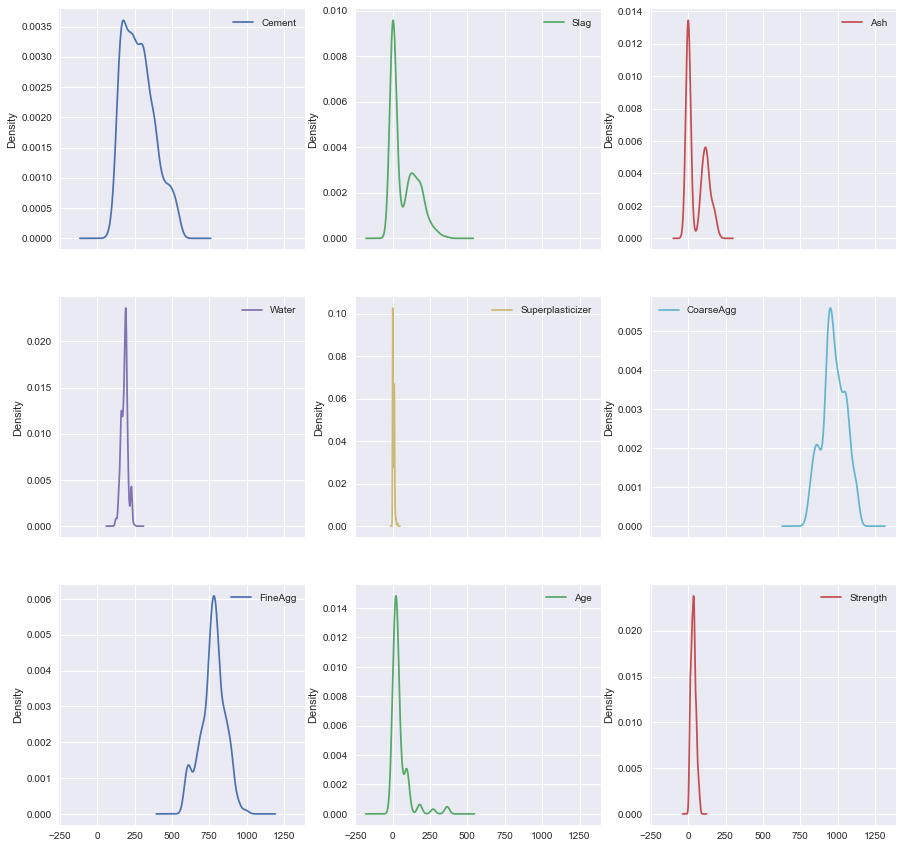

In [70]:
    df.plot(kind='kde',subplots=True,layout = (3,3),figsize=(15,15))
    plt.show()

# CORRELATION PLOT

In [71]:
df.head()

,Cement,Slag,Ash,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


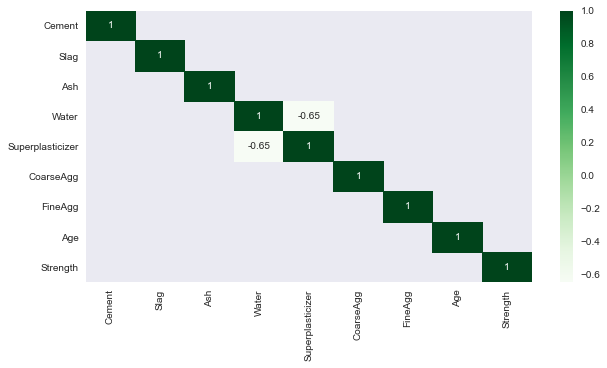

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr()[np.abs(df.corr()) > 0.6],annot=True, cmap='Greens')
plt.yticks(rotation=0) 
plt.show()

In [73]:
strength_corr = df.corr()['Strength'][:-1].sort_values(ascending=False)
print(strength_corr)

Cement              0.49
Superplasticizer    0.34
Age                 0.34
Slag                0.10
Ash                -0.08
CoarseAgg          -0.14
FineAgg            -0.19
Water              -0.27
Name: Strength, dtype: float64


### <i> Observations : <i>
    1) Quantity of CEMENT has highest +ve Corelation of 0.49 wrt Strength 
    2) Quantity of WATER has highest -ve Corelation of -0.27 wrt Strength 
    3) Ash has the least Corelation

# Variance Inflation Factor (VIF)

In [74]:
df_target = df.drop(['Strength'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
vif["Features"] = df_target.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,84.74,CoarseAgg
1,81.40,Water
2,72.50,FineAgg
3,15.16,Cement
4,5.17,Superplasticizer
5,4.17,Ash
6,3.26,Slag
7,1.70,Age


In [75]:
df_target_vif = df.drop(['Strength'],axis=1)
vif_min_factor = 8
from statsmodels.stats.outliers_influence import variance_inflation_factor

for ind in range(len(df_target_vif.columns)):
    vif = pd.DataFrame()
    
    vif["VIF_Factor"] = [variance_inflation_factor(df_target_vif.values, i) for i in range(df_target_vif.shape[1])]
    vif["Features"] = df_target_vif.columns

    multi = vif[vif['VIF_Factor'] > vif_min_factor]
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        #print(vif)
        break
    
    if (df_sorted.empty == False):
        df_target_vif = df_target_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        pass
vif

,VIF_Factor,Features
0,2.72,Cement
1,1.47,Slag
2,1.97,Ash
3,2.90,Superplasticizer
4,1.55,Age


### <i> Observations : <i>
    1) Cutoff VIF is set based on the domain knowledge
    2) For VIF < 8 : Cement, Slag, Ash, Superplasticizer, Age

# Removing Outliers

In [76]:
df_treated = df

Q1 = df_treated.quantile(0.25)
Q3 = df_treated.quantile(0.75)
IQR = Q3 - Q1

df_treated = df_treated[~((df_treated < (Q1 - 1.5 * IQR)) | (df_treated > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Before Outlier Treatment : ", df.shape)
print("After Outlier Treatment : ", df_treated.shape)

Before Outlier Treatment :  (1005, 9)
After Outlier Treatment :  (911, 9)


In [77]:
# Reset Index after Removing Outliers
df_treated.reset_index(drop=True, inplace=True)

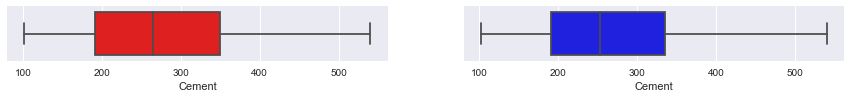

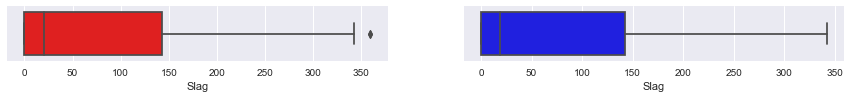

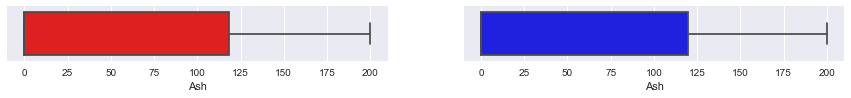

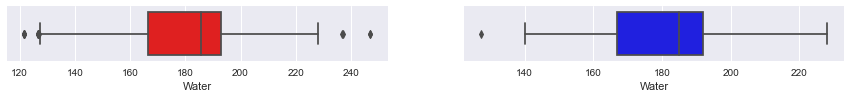

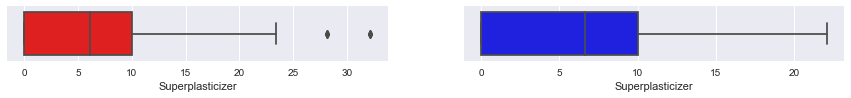

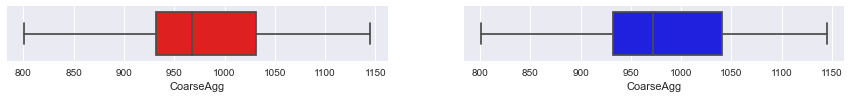

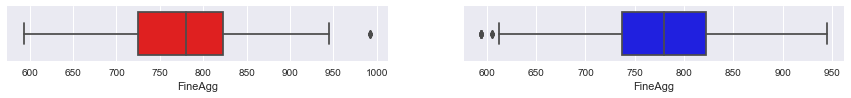

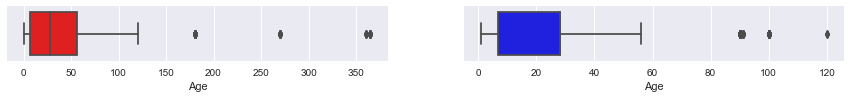

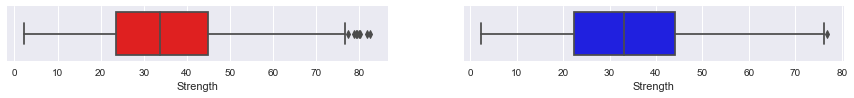

In [78]:
def custom_plot_1(var1,var2):
    fig , axes  = plt.subplots(figsize=(15,1))
    plt.subplot(1,2,1)
    sns.boxplot(var1, color='Red')
    plt.subplot(1,2,2)
    sns.boxplot(var2, color='Blue')
    plt.show()

for a in df.columns:
    custom_plot_1(df[a],df_treated[a])

### <i> Observations : <i>
    1) Before Outlier Treatment :  (1005, 9)
    2) After Outlier Treatment :  (911, 9)

# LINEAR REGRESSION

#### Assumptions of linear regression. We can check two of them before building the regression model

###### 1) Assumption on Dependent Variable : The dependent (target) variable should be numeric. 

In [79]:
df_treated.Strength.dtype

dtype('float64')

###### 2) No or little multicollinearity between features using correlation

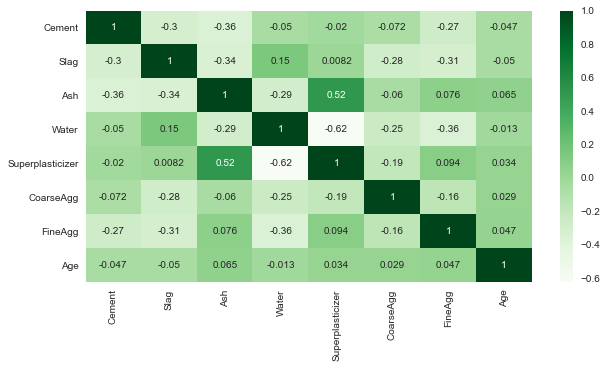

In [80]:
# correlation greater than 0.6 and less than -0.6.

df_features = df_treated.drop(['Strength'],axis=1)
plt.figure(figsize=(10,5))
sns.heatmap(df_features.corr(),annot=True, cmap='Greens')
plt.yticks(rotation=0) 
plt.show()

###### 3) No or little multicollinearity between features using VIF

In [81]:
vif

,VIF_Factor,Features
0,2.72,Cement
1,1.47,Slag
2,1.97,Ash
3,2.90,Superplasticizer
4,1.55,Age


# Reg_Model_1 : With Outliers

In [82]:
X = df.drop(['Strength'], axis=1)
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std())
X = sm.add_constant(X)
y = df[['Strength']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3)

Reg_Model_1 = sm.OLS(y_train, X_train).fit()
print(Reg_Model_1.summary())

print("\n")
print("***************************************************************")

train_pred = Reg_Model_1.predict(X_train)
test_pred = Reg_Model_1.predict(X_test)

rmse_train = round(np.sqrt(mean_squared_error(y_train, train_pred)), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

rmse_test = round(np.sqrt(mean_squared_error(y_test, test_pred)), 4)
print("Root Mean Squared Error (RMSE) on testing set: ", rmse_test)

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     155.0
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          1.34e-156
Time:                        16:02:31   Log-Likelihood:                -3003.8
No. Observations:                 804   AIC:                             6026.
Df Residuals:                     795   BIC:                             6068.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.2337      0.360  

**Model Results Observations:** 

Durbin-Watson : To check the autocorrelation between the residuals

    If the Durbin-Watson is near to 2       : no autocorrelation
    If the Durbin-Watson is between 0 and 2 : positive autocorrelation
    If the Durbin-Watson is between 2 and 4 : negative autocorrelation

Jarque-Bera : test is used to check the normality of the residuals

    If p-value < 0.05 : Residuals are not normally distributed
    If p-value > 0.05 : Residuals are normally distributed

Condition Number (CN) : To check the multicollinearity

    If CN < 100                    : no multicollinearity
    If CN is between 100 and 1000  : moderate multicollinearity
    If CN > 1000                   : severe multicollinearity

### <i> Observations : <i>
    1) The R-squared value obtained from this model is 0.609 which means that the above model explains a 60.9% of the variation in the Concrete Compressive Strength
    2) Durbin-Watson = 1.962( ~ 2) This means there is no autocorrelation
    3) Prob(JB) = 0.166 ( > 0.05) This means that Residuals are normally distributed
    4) Cond. No = 8.86 ( < 10) This means there is no multicollinearity

# Reg_Model_2 : Without Outliers

In [83]:
X = df_treated.drop(['Strength'], axis=1)
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std())
X = sm.add_constant(X)
y = df_treated[['Strength']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3)

Reg_Model_2 = sm.OLS(y_train, X_train).fit()
print(Reg_Model_2.summary())

print("\n")
print("***************************************************************")

train_pred = Reg_Model_2.predict(X_train)
test_pred = Reg_Model_2.predict(X_test)

rmse_train = round(np.sqrt(mean_squared_error(y_train, train_pred)), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

rmse_test = round(np.sqrt(mean_squared_error(y_test, test_pred)), 4)
print("Root Mean Squared Error (RMSE) on testing set: ", rmse_test)

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     268.7
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          2.95e-210
Time:                        16:02:31   Log-Likelihood:                -2537.3
No. Observations:                 728   AIC:                             5093.
Df Residuals:                     719   BIC:                             5134.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.3433      0.295  

### <i> Observations : <i>   
    R-squared has increased from 0.609 to 0.749
    RMSE-Model has reduced from 10.1464 to 7.8958 
    
    1) The R-squared value obtained from this model is 0.749 which means that the above model explains a 74.9% of the variation in the Concrete Compressive Strength
    2) Durbin-Watson = 2.016(~2) This means there is no autocorrelation
    3) Prob(JB) = 0.0919 ( > 0.05) This means that Residuals are normally distributed
    4) Cond. No = 8.55 ( < 10) This means there is no multicollinearity
                              
    We use data without Outliers for further analysis

# Reg_Model_3 : Without Outliers (VIF_Features)

In [84]:
vif.Features.values

array(['Cement', 'Slag', 'Ash', 'Superplasticizer', 'Age'], dtype=object)

In [85]:
X = df_treated[['Cement', 'Slag', 'Ash', 'Superplasticizer', 'FineAgg', 'Age']]
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std())
X = sm.add_constant(X)
y = df_treated[['Strength']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3)

Reg_Model_3 = sm.OLS(y_train, X_train).fit()
print(Reg_Model_3.summary())

print("\n")
print("***************************************************************")

train_pred = Reg_Model_3.predict(X_train)
test_pred = Reg_Model_3.predict(X_test)

rmse_train = round(np.sqrt(mean_squared_error(y_train, train_pred)), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

rmse_test = round(np.sqrt(mean_squared_error(y_test, test_pred)), 4)
print("Root Mean Squared Error (RMSE) on testing set: ", rmse_test)

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     303.3
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          2.04e-193
Time:                        16:02:31   Log-Likelihood:                -2582.5
No. Observations:                 728   AIC:                             5179.
Df Residuals:                     721   BIC:                             5211.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.3426      0.313  

### <i> Observations : <i>   
    R-squared has Reduced from (Reg_Model_2 : Without Outliers) 0.749 to 0.716
    So we do not use features selected from VIF method

# Reg_Model_4 : Without Outliers (Using RFE)
    Recursive Feature Elimination

In [86]:
X = df_treated.drop(['Strength'], axis=1)
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std())
y = df_treated[['Strength']]

# feature extraction
model = LinearRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)

print("Selected Features:",fit.n_features_) 
print("Feature Ranking:",fit.ranking_)
print("feature selected:",fit.support_ )
print("Columns:",X.columns )

X = X.iloc[:,fit.support_]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3)

Reg_Model_4 = sm.OLS(y_train, X_train).fit()
print(Reg_Model_4.summary())

print("\n")
print("***************************************************************")

train_pred = Reg_Model_4.predict(X_train)
test_pred = Reg_Model_4.predict(X_test)

rmse_train = round(np.sqrt(mean_squared_error(y_train, train_pred)), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

rmse_test = round(np.sqrt(mean_squared_error(y_test, test_pred)), 4)
print("Root Mean Squared Error (RMSE) on testing set: ", rmse_test)

Selected Features: 6
Feature Ranking: [1 1 1 1 1 2 3 1]
feature selected: [ True  True  True  True  True False False  True]
Columns: Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer', 'CoarseAgg',
       'FineAgg', 'Age'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          1.53e-212
Time:                        16:02:31   Log-Likelihood:                -2537.9
No. Observations:                 728   AIC:                             5090.
Df Residuals:                     721   BIC:                             5122.
Df Model:                           6                                         
Covariance Type:            nonrob

### <i> Observations : <i>   
    1) R-squared has not changed from (Reg_Model_2 : Without Outliers) it is same as 0.749
    2) RMSE-Model has slightly increased from 7.8958 to 7.9026
    3) 'CoarseAgg' and 'FineAgg' is not usefull in predecting the Concrete Compressive strength

# Reg_Model_5 : Without Outliers (Using RFE with Interaction)

In [87]:
df_inter = df_treated.copy()
df_inter['Slag/Cement'] = df_inter['Slag'] / df_inter['Cement']
df_inter['Ash/Cement'] = df_inter['Ash'] / df_inter['Cement']
df_inter['Water/Cement'] = df_inter['Water'] / df_inter['Cement']
df_inter['CoarseAgg/Cement'] = df_inter['CoarseAgg'] / df_inter['Cement']
df_inter['FineAgg/Cement'] = df_inter['FineAgg'] / df_inter['Cement']
df_inter['Superplasticizer/Cement'] = df_inter['Superplasticizer'] / df_inter['Cement']
df_inter.head()

,Cement,Slag,Ash,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength,Slag/Cement,Ash/Cement,Water/Cement,CoarseAgg/Cement,FineAgg/Cement,Superplasticizer/Cement
0,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89,0.00,0.00,0.30,1.95,1.25,0.00
1,266.00,114.00,0.00,228.00,0.00,932.00,670.00,90,47.03,0.43,0.00,0.86,3.50,2.52,0.00
2,380.00,95.00,0.00,228.00,0.00,932.00,594.00,28,36.45,0.25,0.00,0.60,2.45,1.56,0.00
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85,0.43,0.00,0.86,3.50,2.52,0.00
4,475.00,0.00,0.00,228.00,0.00,932.00,594.00,28,39.29,0.00,0.00,0.48,1.96,1.25,0.00


In [88]:
X = df_inter.drop(['Strength'], axis=1)
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std())
y = df_inter[['Strength']]

# feature extraction
model = LinearRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)

print("Selected Features:",fit.n_features_) 
print("Feature Ranking:",fit.ranking_)
print("feature selected:",fit.support_ )
print("Columns:",X.columns )

X = X.iloc[:,fit.support_]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3)

Reg_Model_5 = sm.OLS(y_train, X_train).fit()
print(Reg_Model_5.summary())


print("\n")
print("***************************************************************")

train_pred = Reg_Model_5.predict(X_train)
test_pred = Reg_Model_5.predict(X_test)

rmse_train = round(np.sqrt(mean_squared_error(y_train, train_pred)), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

rmse_test = round(np.sqrt(mean_squared_error(y_test, test_pred)), 4)
print("Root Mean Squared Error (RMSE) on testing set: ", rmse_test)

Selected Features: 6
Feature Ranking: [1 1 1 1 7 8 5 1 2 6 3 1 4 9]
feature selected: [ True  True  True  True False False False  True False False False  True
 False False]
Columns: Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer', 'CoarseAgg',
       'FineAgg', 'Age', 'Slag/Cement', 'Ash/Cement', 'Water/Cement',
       'CoarseAgg/Cement', 'FineAgg/Cement', 'Superplasticizer/Cement'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     361.1
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          2.17e-213
Time:                        16:02:31   Log-Likelihood:                -2535.9
No. Observations:                 728   AIC:                             5086.
Df Residuals:             

### <i> Observations : <i>   
    1) R-squared has changed from (Reg_Model_2 : Without Outliers) 0.749 to 0.75
    2) RMSE-Model has slightly decreased from 7.90 to 7.88

# Final Regression Equation

In [89]:
res = pd.DataFrame(Reg_Model_5.params,columns=['Coefficient'])
res['abs'] = np.abs(res['Coefficient'])
res.sort_values(by=['abs'], inplace=True,ascending=False)
res.drop(['abs'],axis=1,inplace=True)
res['Effect on Strength'] = 'NULL'
for i in range(len(res)):
    if res['Coefficient'][i] >= 0:
        res['Effect on Strength'][i] = "Increasing"
    else:
        res['Effect on Strength'][i] = "Decreasing"

    Strength = 34.33 + (Cement x 8.91) + (Slag x 7.36) + (Ash x 4.32) +
               (Water x -4.88) + (Age x 8.98) + (CoarseAgg/Cement x -2.61)

In [90]:
print("For every Unit increase in : ")
res.iloc[1: , :]

For every Unit increase in : 


,Coefficient,Effect on Strength
Age,8.98,Increasing
Cement,8.91,Increasing
Slag,7.36,Increasing
Water,-4.88,Decreasing
Ash,4.32,Increasing
CoarseAgg/Cement,-2.61,Decreasing


### Business Interpretation: 

    With BIAS of 34.33 in Strength Keeping all the features constant for every unit increase in: 
        Cement, expect an increase by 8.91 in Strength
        Slag, expect an increase by 7.36 in Strength
        Ash, expect an increase by 4.32 in Strength
        Water, expect a decrease by 4.88 in Strength
        Age, expect an increase by 8.98 in Strength
        CoarseAgg/Cement Ratio, expect a decrease by 2.61 in Strength

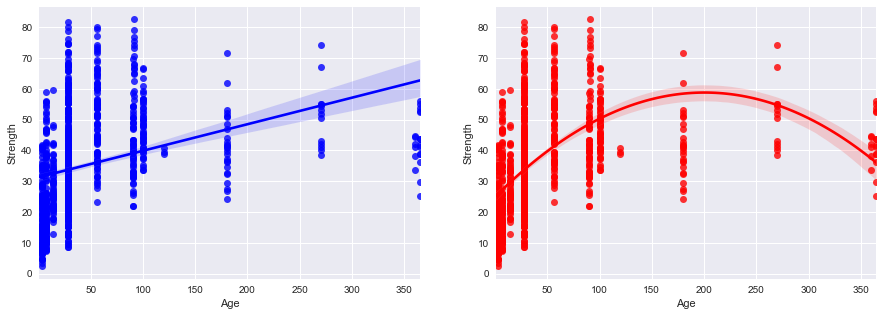

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(x=df.Age, y =df.Strength,order=1,color='Blue')
plt.subplot(1,2,2)
sns.regplot(x=df.Age, y =df.Strength,order=2,color='Red')
plt.show()

# Assumptions After MLR Model

Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:

1. Linear Relationship Between Dependent and Independent Variable

2. Autocorrelation 

3. Heteroscedasticity

4. Tests of Normality

#### 1) Linear Relationship between Dependent and Independent Variable

An assumption of linear regression is that it should be linear in the parameter. To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

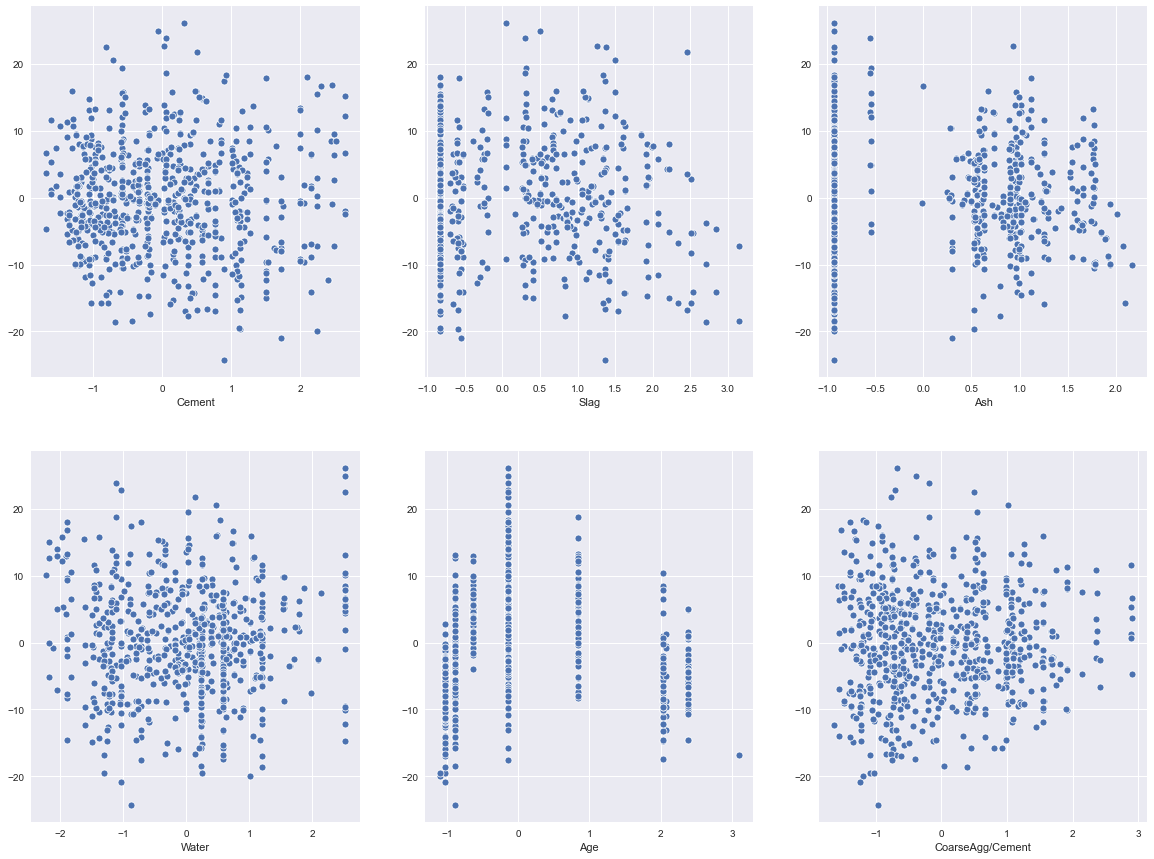

In [92]:
fig, ax = plt.subplots(nrows = 2, ncols= 3, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(X_train[variable],Reg_Model_5.resid , ax=subplot)
plt.show()

#### 2) Autocorrelation

In [93]:
print(Reg_Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     361.1
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          2.17e-213
Time:                        16:02:34   Log-Likelihood:                -2535.9
No. Observations:                 728   AIC:                             5086.
Df Residuals:                     721   BIC:                             5118.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.3362      0.294  

**Interpretation:** From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is slightly greater than 2. Thus, we conclude that there is a very slight Negative autocorrelation.

#### 3) Heteroskedasticity

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [94]:
name = ['f-value','p-value']
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_breuschpagan(Reg_Model_5.resid, Reg_Model_5.model.exog)
lzip(name, test[2:])

[('f-value', 12.954660862133359), ('p-value', 6.107772346795603e-14)]

**Interpretation:** We observe that the p-value is less than 0.05; thus, we reject the Null Hypothesis and conculde there is heteroskedasticity present in the data.

#### 4) Tests for Normality

###### a. Shapiro-Wilk Test (Tests for Normality)

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

H0: Residuals are normally distributed 

H1:  Residuals are not normally distributed

In [95]:
stat, p_value = shapiro(Reg_Model_5.resid)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9975106120109558
P-Value: 0.34573236107826233


**Interpretation:** From the above test we can see that the p-value is 0.345 (greater than 0.05), thus we fail to reject the H0 and can say that the residuals are normally distributed.

###### b. Q-Q Plot(Tests for Normality)

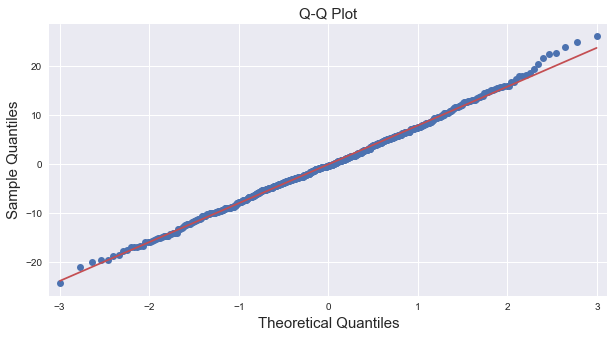

In [96]:
plt.rcParams['figure.figsize'] = [10,5]

qqplot(Reg_Model_5.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

**Interpretation:** The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As most of the points are close to the diagonal line, we conclude that the residuals do follow a normal distribution.

### To improve accuracy and efficiency of Prediction used different Regression Models to compare R^2 & RMSE

#### KFOLD 10 times 10 Fold comparison of all model preparation

In [97]:
# Segregating Dependent and Independent variable for model input
X = df_inter.drop(['Strength'], axis=1)
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std())
y = df_inter[['Strength']]
X = X.iloc[:,fit.support_]

##### LINEAR REGRESSION

In [98]:
model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X,y, cv=cv)
reg_cv_mse = cross_val_score(model, X,y, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.7514546644533469
RMSE : 7.832414362692269


##### LASSO

In [99]:
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X,y, cv=cv)
reg_cv_mse = cross_val_score(model, X,y, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.7103772334318497
RMSE : 8.470905760195096


##### RIDGE

In [100]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X,y, cv=cv)
reg_cv_mse = cross_val_score(model, X,y, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.7514800415583954
RMSE : 7.832191394205545


##### RANDOM FOREST REGRESSOR

In [101]:
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X,y, cv=cv)
reg_cv_mse = cross_val_score(model, X,y, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.9007308843231763
RMSE : 4.94343975028291


### RFR MODEL PARAMETER TUNING USING GRIDSEARCHCV AND RANDOMIZEDSEARCHCV

1. GridSearchCV defines the combinations and do training of the model 
whereas in RandomizedSearchCV the model selects the combinations randomly
2. GridSearchCV is slower than RandomizedSearchCV,however with better accuracy

In [102]:
#Parameter Definition
bootstrap=[True,False]
max_features=[1,2,3,4,5,'auto']
n_estimators=[50,100,200,300,400]
param_grid = dict(bootstrap=bootstrap,max_features=max_features,n_estimators=n_estimators)
model = RandomForestRegressor()

#### Radomized Search CV

In [103]:
random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("R2: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

R2: 0.806984 using {'n_estimators': 300, 'max_features': 3, 'bootstrap': False}
Execution time: 23.957238912582397 ms


#### Grid Search CV

In [104]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("R2: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

R2: 0.818345 using {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
Execution time: 84.22859454154968 ms


##### xTREME GRADIENT BOOSTING MACHINE REGRESSOR

In [105]:
model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X,y, cv=cv)
reg_cv_mse = cross_val_score(model, X,y, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.923741111893423
RMSE : 4.3269592415099005


# CONCLUSION

##### Problem Statement
    Identifying significant features to strengthen the concrete and to predict the same accurately and efficiently.

###### EDA
    On the data of 911 observations spreaded across 9 features of which Cement,Slag,Ash,Superplasticity, FineAgg and Age is playing pivotal role in the strength of the Concrete.

    In which Cement and Water has highest effect of strength, like Cement Strengthens whereas Water Weakens.However Ash has no effect.

#### OLS Model Execution:
Model |R^2 |RMSE Train |RMSE Test
:-----|:-----|:----- |:-----
Reg_Model_1 : MLR With Outliers|0.609|10.1464 |10.6916
Reg_Model_2 : MLR Without Outliers|0.749|7.8958 |7.3836
Reg_Model_3 : MLR Without Outliers + VIF_Features|0.716|8.4013 |7.6931
Reg_Model_4 : MLR Without Outliers + Using RFE|0.749|7.9026 |7.4179
Reg_Model_5 : MLR Without Outliers + Using RFE + Interaction|0.751|7.8838|7.3479

    Regression Equation :
    -------------------
    Strength = 34.33 + (Cement x 8.91) + (Slag x 7.36) + (Ash x 4.32) +
               (Water x -4.88) + (Age x 8.98) + (CoarseAgg/Cement x -2.61) 
               

    Business Interpretation :
    -----------------------
    From OLS modelling, we understood with a BIAS of 34.33 in strength and keeping all other features constant with one unit change in Cement, we can expect increament of strength by 8.91, similarly with one unit change in Water expect a decrease by 4.88 and so on.
 
  
   
    
     
      
       
Once we could explain the strength's feature composition with an mathematical formula, we tried to improve the accuracy and efficiency of prediction, we used different regression techniques:

#### Advanced Regression Model Execution:
    NOTE: Ran with 10 Times 10 Fold using Cross Value Score and Data used is without Outliers 

Model |R^2 |RMSE 
:-----|:-----|:----- 
Reg_Model_6 : LinearRegression |0.751|7.841
Reg_Model_7 : Lasso|0.71|8.48
Reg_Model_8 : Ridge|0.751|7.839
Reg_Model_9 : RandomForestRegressor|0.901|4.941
Reg_Model_10: XGBoost|0.921|4.397

As expected, Boosting Algorithm here XGBoost is working the best with R2 of .92 and RMSE of 4.4.


# LAZY Regression Predicitor

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3)

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00,  9.17it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LGBMRegressor                                0.91       0.91   4.75   
XGBRegressor                                 0.91       0.91   4.77   
HistGradientBoostingRegressor                0.91       0.91   4.78   
GradientBoostingRegressor                    0.90       0.90   5.03   
RandomForestRegressor                        0.90       0.90   5.04   
ExtraTreesRegressor                          0.89       0.90   5.17   
BaggingRegressor                             0.89       0.89   5.29   
DecisionTreeRegressor                        0.80       0.81   7.07   
KNeighborsRegressor                          0.80       0.81   7.11   
HuberRegressor                               0.79       0.80   7.29   
LinearSVR                                    0.79       0.80   7.30   
ElasticNetCV                                 0.79       0.79   7.34   
SGDReg

In [107]:
model = lgb.LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X,y, cv=cv)
reg_cv_mse = cross_val_score(model, X,y, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.9140596322791334
RMSE : 4.600769544954111


# References

1) https://towardsdatascience.com/concrete-compressive-strength-prediction-using-machine-learning-4a531b3c43f3

2) https://scialert.net/fulltext/?doi=jas.2009.155.160

3) https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

4) https://towardsdatascience.com/train-all-classification-or-regression-models-in-one-line-of-python-code-4ccdcaf01f0c

5) https://www.kaggle.com/onuralpsisman/prediction-of-concrete-quality

6) https://concreteflooringsolutions.co.uk/blog/understanding-concrete-mix-ratios-all-mixes-for-all-concrete-projects/

# THANK YOU